In [1]:
#1. Get a dataset of all Zählstellen
import json
import pandas as pd
import requests
import numpy as np


In [2]:
#read the data from the web
response = requests.get("https://iot.hamburg.de/v1.1/Datastreams?$filter=properties/serviceName eq 'HH_STA_AutomatisierteVerkehrsmengenerfassung' and properties/layerName eq 'Anzahl_Kfz_Zaehlstelle_1-Tag'&$top=500")

In [3]:
#Turn the JSON response in usable data
#Extract the data from the the response object
betterdata=response.json()
#only select the data, which are under the heading "value" and convert this to a pandas dataframe
test = betterdata["value"]
df = pd.DataFrame.from_dict(test)
df.head()

,description,@iot.id,name,observationType,observedArea,phenomenonTime,properties,resultTime,@iot.selfLink,unitOfMeasurement,Sensor@iot.navigationLink,ObservedProperty@iot.navigationLink,Thing@iot.navigationLink,Observations@iot.navigationLink
0,Die Anzahl der von der Infrarotkamera erfasste...,13932,Kfz-Aufkommen an Verkehrszählstelle 0352920 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.084032, 5...",2020-10-31T23:00:00.000Z/2021-08-14T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-01-24T01:34:33.636Z/2021-08-15T01:30:38.093Z,https://iot.hamburg.de/v1.1/Datastreams(13932),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(13932)...,https://iot.hamburg.de/v1.1/Datastreams(13932)...,https://iot.hamburg.de/v1.1/Datastreams(13932)...,https://iot.hamburg.de/v1.1/Datastreams(13932)...
1,Die Anzahl der von der Infrarotkamera erfasste...,12992,Kfz-Aufkommen an Verkehrszählstelle 0235960 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.000681, 5...",2020-10-31T23:00:00.000Z/2021-08-14T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-01-24T01:17:20.629Z/2021-08-15T01:16:47.672Z,https://iot.hamburg.de/v1.1/Datastreams(12992),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(12992)...,https://iot.hamburg.de/v1.1/Datastreams(12992)...,https://iot.hamburg.de/v1.1/Datastreams(12992)...,https://iot.hamburg.de/v1.1/Datastreams(12992)...
2,Die Anzahl der von der Infrarotkamera erfasste...,13432,Kfz-Aufkommen an Verkehrszählstelle 0339980 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.067056, 5...",2020-10-31T23:00:00.000Z/2021-08-14T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-01-25T12:02:33.005Z/2021-08-15T01:22:55.716Z,https://iot.hamburg.de/v1.1/Datastreams(13432),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(13432)...,https://iot.hamburg.de/v1.1/Datastreams(13432)...,https://iot.hamburg.de/v1.1/Datastreams(13432)...,https://iot.hamburg.de/v1.1/Datastreams(13432)...
3,Die Anzahl der von der Infrarotkamera erfasste...,13824,Kfz-Aufkommen an Verkehrszählstelle 0241931 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.080923, 5...",2020-10-31T23:00:00.000Z/2021-08-14T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-01-24T01:32:26.784Z/2021-08-15T01:29:14.738Z,https://iot.hamburg.de/v1.1/Datastreams(13824),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(13824)...,https://iot.hamburg.de/v1.1/Datastreams(13824)...,https://iot.hamburg.de/v1.1/Datastreams(13824)...,https://iot.hamburg.de/v1.1/Datastreams(13824)...
4,Die Anzahl der von der Infrarotkamera erfasste...,13288,Kfz-Aufkommen an Verkehrszählstelle 0393930 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.206799, 5...",2020-10-31T23:00:00.000Z/2021-02-05T22:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-01-25T12:27:23.141Z/2021-03-18T16:04:03.166Z,https://iot.hamburg.de/v1.1/Datastreams(13288),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(13288)...,https://iot.hamburg.de/v1.1/Datastreams(13288)...,https://iot.hamburg.de/v1.1/Datastreams(13288)...,https://iot.hamburg.de/v1.1/Datastreams(13288)...


In [4]:
#2. Loop through the links of all "Zählstellen" to receive a dataset of the nr. of vehicles for every day/every "Zählstelle"

## generate links and append to df
df["links"] = df["Observations@iot.navigationLink"].apply(lambda x: x + "?$top=600")
df['id'] = df['@iot.id']

# clean dataframe where we dont find geo information
# 2 rows should be removed
print(f'Rows before NA removal: {len(df)}')
df = df.dropna()
print(f'Rows after NA removal: {len(df)}')
# extract the lat/long information to join later
df['long'] = df['observedArea'].apply(lambda x: x['coordinates'][0])
df['lat'] = df['observedArea'].apply(lambda x: x['coordinates'][1])

Rows before NA removal: 500
Rows after NA removal: 500


In [5]:
# create a list for the results
columns = ['@iot.id','phenomenonTime', 'result','resultTime']
missing_data = list()
df_complete = pd.DataFrame(columns = columns)

unique_links = df["links"].unique()

for link in unique_links:
    print(f'Retrieving data for {link}')
    response = requests.get(link)
    json = response.json()
    df_temp = pd.DataFrame.from_dict(json["value"])
    if set(columns).issubset(set(df_temp.columns)):
        df_temp = df_temp[columns]
        df_temp['id'] = link[40:45]
        df_complete = df_complete.append(df_temp,sort=False)
#        df_complete['id'] = df_complete['id'].astype('int64')
    else:
        # no data available
        print(f'---- WARNING: No data available or wrong columns selected for {link}')
        missing_data.append(link)
df_complete['id'] = df_complete['id'].astype('int64')
df_complete['result'] = df_complete['result'].astype('int64')

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13932)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(12992)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13432)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13824)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13288)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13784)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14108)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13912)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13124)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13168)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13712)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14632)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14648)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13676)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14724)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14780)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13688)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14004)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14804)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14864)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13700)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14800)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13704)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14472)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13696)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14844)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13680)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14444)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14796)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14440)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14448)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13820)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13828)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13500)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13496)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13440)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13464)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13468)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14532)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13684)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13236)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13456)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13856)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14752)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14376)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14680)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14684)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(12932)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13988)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14688)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(12928)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14700)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14092)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14088)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14692)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15976)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15988)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(16008)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15984)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(16004)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(16044)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(16032)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(16024)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(16020)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15928)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15904)/Observations?$top=600
Retrieving data for h

In [6]:
missing_data

[]

In [7]:
len(df_complete)

123024

In [8]:
df_complete['resultTime'].min()

'2021-01-23T01:15:13.632Z'

In [9]:
df_complete.head()

,@iot.id,phenomenonTime,result,resultTime,id
0,51219594,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,23171,2021-03-15T20:26:04.422Z,13932
1,51494019,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,11408,2021-01-24T01:34:33.636Z,13932
2,51731556,2021-01-23T23:00:00.000Z/2021-01-24T22:59:59.000Z,7752,2021-03-15T21:07:41.443Z,13932
3,51837122,2020-11-30T23:00:00.000Z/2020-12-01T22:59:59.000Z,26346,2021-03-15T13:09:54.378Z,13932
4,51837190,2020-10-31T23:00:00.000Z/2020-11-01T22:59:59.000Z,11055,2021-03-15T13:09:26.875Z,13932


In [10]:
df_raw = pd.merge(df_complete,df[['id','lat','long']], how='inner',on='id')
                        

In [11]:
df_raw.head()

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,51219594,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,23171,2021-03-15T20:26:04.422Z,13932,53.546846,10.084032
1,51494019,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,11408,2021-01-24T01:34:33.636Z,13932,53.546846,10.084032
2,51731556,2021-01-23T23:00:00.000Z/2021-01-24T22:59:59.000Z,7752,2021-03-15T21:07:41.443Z,13932,53.546846,10.084032
3,51837122,2020-11-30T23:00:00.000Z/2020-12-01T22:59:59.000Z,26346,2021-03-15T13:09:54.378Z,13932,53.546846,10.084032
4,51837190,2020-10-31T23:00:00.000Z/2020-11-01T22:59:59.000Z,11055,2021-03-15T13:09:26.875Z,13932,53.546846,10.084032


In [12]:
df_raw.loc[df_raw['id']!=13600]

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,51219594,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,23171,2021-03-15T20:26:04.422Z,13932,53.546846,10.084032
1,51494019,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,11408,2021-01-24T01:34:33.636Z,13932,53.546846,10.084032
2,51731556,2021-01-23T23:00:00.000Z/2021-01-24T22:59:59.000Z,7752,2021-03-15T21:07:41.443Z,13932,53.546846,10.084032
3,51837122,2020-11-30T23:00:00.000Z/2020-12-01T22:59:59.000Z,26346,2021-03-15T13:09:54.378Z,13932,53.546846,10.084032
4,51837190,2020-10-31T23:00:00.000Z/2020-11-01T22:59:59.000Z,11055,2021-03-15T13:09:26.875Z,13932,53.546846,10.084032
...,...,...,...,...,...,...,...
123019,207519115,2021-07-30T22:00:00.000Z/2021-07-31T21:59:59.000Z,13353,2021-08-01T01:25:45.490Z,13636,53.608364,10.047049
123020,208612746,2021-07-31T22:00:00.000Z/2021-08-01T21:59:59.000Z,10800,2021-08-02T01:25:40.913Z,13636,53.608364,10.047049
123021,210231629,2021-08-01T22:00:00.000Z/2021-08-02T21:59:59.000Z,23234,2021-08-03T01:26:04.015Z,13636,53.608364,10.047049
123022,211944249,2021-08-02T22:00:00.000Z/2021-08-03T21:59:59.000Z,21855,2021-08-04T01:26:39.718Z,13636,53.608364,10.047049


## Debug section

In [13]:
# only for debugging
columns_test = ['@iot.id','phenomenonTime', 'result','resultTime']
missing_data_test = list()
df_complete_test = pd.DataFrame(columns = columns_test)

# first link doesnt return data, second one works
unique_links_test = ['https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600',
                     'https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600']

for link in unique_links_test:
    print(f'Retrieving data for {link}')
    response = requests.get(link)
    json = response.json()
    df_temp_test = pd.DataFrame.from_dict(json["value"])
    if set(columns_test).issubset(set(df_temp_test.columns)):
        df_temp_test = df_temp_test[columns_test]
        df_temp_test['id'] = link[40:45]
        df_complete_test = df_complete_test.append(df_temp_test,sort=False)
        df_complete_test['id'] = df_temp_test['id'].astype('int64')
    else:
        # no data available
        print(f'---- WARNING: No data available or wrong columns selected for {link}')
        missing_data_test.append(link)


Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600
---- WARNING: No data available or wrong columns selected for https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600


In [14]:
df_raw_test = pd.merge(df_complete_test,df[['id','lat','long']], how='inner',on='id')
                        

In [15]:
df_raw_test

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,51218837,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,11444.0,2021-03-15T20:26:03.599Z,13596,53.579579,10.057484
1,51493103,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,9611.0,2021-03-15T20:47:20.954Z,13596,53.579579,10.057484
2,51730741,2021-01-23T23:00:00.000Z/2021-01-24T22:59:59.000Z,6940.0,2021-03-15T21:07:40.572Z,13596,53.579579,10.057484
3,51836604,2020-10-31T23:00:00.000Z/2020-11-01T22:59:59.000Z,11225.0,2021-03-15T13:09:26.108Z,13596,53.579579,10.057484
4,51836487,2020-11-30T23:00:00.000Z/2020-12-01T22:59:59.000Z,18010.0,2021-03-15T13:09:53.581Z,13596,53.579579,10.057484
...,...,...,...,...,...,...,...
127,152467732,2021-06-17T22:00:00.000Z/2021-06-18T21:59:59.000Z,13858.0,2021-06-19T01:24:36.318Z,13596,53.579579,10.057484
128,154042210,2021-06-18T22:00:00.000Z/2021-06-19T21:59:59.000Z,10788.0,2021-06-20T01:24:37.147Z,13596,53.579579,10.057484
129,155510409,2021-06-19T22:00:00.000Z/2021-06-20T21:59:59.000Z,466.0,2021-06-21T01:24:28.328Z,13596,53.579579,10.057484
130,160875346,2021-06-24T22:00:00.000Z/2021-06-25T21:59:59.000Z,1828.0,2021-06-26T01:24:42.911Z,13596,53.579579,10.057484


In [32]:
df_clean_data = pd.read_csv(r'C:\Users\mario\PycharmProjects\pythonProject1\hh_techlabs_group12\clean_data_2021-08-14.csv')
df_clean_data

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,217458399,2021-08-12,1090,15808,53.650597,9.949614,Thursday
1,216650904,2021-08-11,1040,15808,53.650597,9.949614,Wednesday
2,219332283,2021-08-13,1013,15808,53.650597,9.949614,Friday
3,51222146,2021-01-22,7831,14812,53.628402,10.140319,Friday
4,51496408,2021-01-23,5187,14812,53.628402,10.140319,Saturday
...,...,...,...,...,...,...,...
120804,207523877,2021-07-31,4156,14412,53.530336,10.065717,Saturday
120805,208617775,2021-08-01,2851,14412,53.530336,10.065717,Sunday
120806,210239080,2021-08-02,4901,14412,53.530336,10.065717,Monday
120807,211949905,2021-08-03,4572,14412,53.530336,10.065717,Tuesday


Visualisierung - Patricia
1. Wochentage rausfinden und Durchschnitt über Wochentage legen

In [16]:
for i in df_raw['phenomenonTime']:
    t = i[25:35]
    day = pd.Timestamp(t)
    weekday = day.day_name()
    print(weekday)


Friday
Saturday
Sunday
Tuesday
Sunday
Friday
Saturday
Monday
Wednesday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Tuesday
Saturday
Tuesday
Sunday
Monday
Thursday
Friday
Wednesday
Sunday
Saturday
Monday
Sunday
Tuesday
Monday
Friday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Friday
Thursday
Wednesday
Friday
Thursday
Sunday
Friday
Tuesday
Wednesday
Tuesday
Sunday
Wednesday
Friday
Monday
Tuesday
Saturday
Friday
Wednesday
Monday
Thursday
Sunday
Tuesday
Monday
Thursday
Monday
Friday
Thursday
Saturday
Saturday
Wednesday
Sunday
Monday
Sunday
Friday
Monday
Saturday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Tuesday
Thursday
Wednesday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Thursday
Tuesday
Sunday
Saturday
Monday
Monday
Saturday
Thursday
Thursday
Sunday
Saturday
Wednesday
Wednesday
Tuesday
Thursday
Friday
Tuesday
Wednesda

Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Tuesday
Friday
Saturday
Thursday
Sunday
Friday
Monday
Saturday
Tuesday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Wednesday
Wednesday
Friday
Wednesday
Monday
Tuesday
Wednesday
Saturday
Monday
Monday
Friday
Thursday
Sunday
Saturday
Tuesday
Wednesday
Sunday
Tuesday
Friday
Thursday
Wednesday
Saturday
Thursday
Sunday
Friday
Monday
Tuesday
Saturday
Wednesday
Thursday
Sunday
Monday
Monday
Tuesday
Sunday
Tuesday
Thursday
Wednesday
Friday
Thursday
Saturday
Friday
Saturday
Monday
Thursday
Sunday
Sunday
Tuesday
Monday
Wednesday
Thursda

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Friday
Saturday
Sunday
Tuesday
Friday
Sunday
Saturday
Monday
Wednesday
Thursday
Tuesday
Friday
Wednesday
Thursday
Saturday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Saturda

Tuesday
Wednesday
Monday
Saturday
Tuesday
Sunday
Thursday
Wednesday
Friday
Monday
Saturday
Thursday
Friday
Wednesday
Thursday
Friday
Tuesday
Wednesday
Monday
Saturday
Tuesday
Sunday
Thursday
Wednesday
Friday
Sunday
Tuesday
Monday
Friday
Wednesday
Thursday
Sunday
Friday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Monday
Saturday
Friday
Thursday
Wednesday
Sunday
Wednesday
Saturday
Monday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Thursday
Tuesday
Sunday
Saturday
Monday
Saturday
Monday
Thursday
Saturday
Wednesday
Friday
Saturday
Monday
Tuesday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday


Monday
Tuesday
Wednesday
Thursday
Wednesday
Friday
Thursday
Saturday
Friday
Saturday
Sunday
Sunday
Monday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Thursday
Tuesday
Wednesday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
S

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Sunday
Monday
Wednesday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Saturday
Friday
Monday
Tuesday
Wednesday
Friday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Tuesday
Thursday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Monday
Wednesday
Saturday
Sunday
Friday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday


Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Wednesday
Sunday
Tuesday
Friday
Monday
Saturday
Tuesday
Wednesday
Sunday
Thursday
Monday
Friday
Tuesday
Saturday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Sunday
Wednesda

Saturday
Sunday
Wednesday
Monday
Saturday
Monday
Sunday
Wednesday
Friday
Thursday
Friday
Wednesday
Sunday
Thursday
Friday
Tuesday
Monday
Wednesday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Sunday
Tuesday
Monday
Wednesday
Thursday
Monday
Friday
Saturday
Tuesday
Saturday
Monday
Tuesday
Wednesday
Saturday
Thursday
Thursday
Friday
Sunday
Tuesday
Wednesday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Thursday
Tuesday
Tuesday
Thursday
Saturday
Tuesday
Sunday
Tuesday
Monday
Saturday
Saturday
Thursday
Thursday
Friday
Wednesday
Tuesday
Thursday
Sunday
Friday
Sunday
Friday
Monday
Monday
Tuesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Wednesday
Saturday
Saturday
Tuesday
We

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Tuesday
Friday
Sunday
Saturday
Monday
Wednesday
Monday
Sunday
Tuesday
Thursday
Friday
Wednesday
Thursday
Tuesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Monday
Monday
Friday
Sunday
Wednesday
Friday
Saturday
Thursday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Saturday
Sunday
Wednesday
Friday
Thursday
Saturday
Tuesday
Friday
Wednesday
Sunday
Saturday
Wednesday
Thursday
Monday
Sunday
Tuesday
Friday
W

Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Tuesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Saturday
Wednesday
Tuesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Friday
Saturday
Sunday
Sunday
Friday
Tuesday
Monday
Wednesday
Tuesday
Saturday
Sunday
Thursday
Monday
Friday
Wednesday
Thursday
Tuesday
Saturday
Sunday
Friday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Monday
Thursday
Monday
Sunday
Tuesday
Friday
Wednesday
Saturday
Thursday
Tuesday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Sunday
Saturday
Monday
Saturday
Thursday
Sunday
Tuesday
Friday
Monday
Wednesday
Tuesday
Thursday
Wednesday
Sunday
Friday
Monday
Thursday

Tuesday
Monday
Sunday
Wednesday
Monday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Monday
Thursday
Monday
Wednesday
Friday
Saturday
Sunday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Fri

Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Tuesday
Sunday
Friday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Sunday
Friday
Wednesday
Monday
Saturday
Thursday
Sunday
Tuesday
Saturday
Friday
Monday
Friday
Wednesday
Wednesday
Tuesday
Sunday
Thursday
Wednesday
Monday
Thursday
Saturday
Tuesday
Friday
Sunday
Saturday
Monday
Thursday
Sunday
Friday
Monday
Tuesday
Saturday
Wednesday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Tuesday
Saturday
Friday
Sunday
Wednesday
Thursday
Monday
Sunday
Friday
Tuesday
Monday
Saturday
Wednesday
Tuesday
Wednesday
Sunday
Thursday
Monday
Friday
Monday
Saturday
Friday
Sunday
Saturday
Monday
Wednesday
Thursday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday


Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Friday
Sunday
Saturday
Wednesday
Thursday
Tuesday
Sunday
Monday
Friday
Wednesday
Saturday
Thursday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Sunday
Saturday
Wednesday
Friday
Thursday
Saturday
Monday
Sunday
Tuesday
Monday
Wednesday
Monday
Saturday
Tuesday
Sunday
Thursday
Wednesday
Friday
Thursday
Friday
Tuesday
Wednesday
Sunday
Saturday
Thursday
Monday
Sunday
Friday
Tuesday
Monday
Wednesday
Saturday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Friday
Tuesday
Sunday
Wednesday
Saturday
Thursday
Monday
Sunday
Tuesday
Wednesday
Saturday
Tuesday
Wednesday
Friday
Thursday
Friday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday

Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Tuesday
Sunday
Friday
Monday
Wednesday
Saturday
Thursday
Tuesday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Friday
Monday
Sunday
Sunday
Wednesday
Friday
Saturday
Thursday
Sunday
Tuesday
Saturday
Monday
Wednesday
Sunday
Monday
Tuesday
Thursday
Wednesday
Friday
Friday
Thursday
Wednesday
Saturday
Tuesday
Saturday
Monday
Sunday
Saturday
Thursday
Friday
Tuesday
Wednesday
Monday
Tuesday
Sunday
Wednesday
Thursday
Friday
Monday
Thursday
Tuesday
Saturday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Tuesday
Sunday
Wednesday
Thursday
Friday
Friday
Thursday
Saturday
Sunday
Thursday
Monday
Sunday
T

Sunday
Monday
Friday
Monday
Wednesday
Saturday
Tuesday
Sunday
Thursday
Wednesday
Friday
Thursday
Saturday
Tuesday
Friday
Wednesday
Sunday
Saturday
Thursday
Monday
Sunday
Tuesday
Friday
Monday
Saturday
Tuesday
Thursday
Sunday
Thursday
Wednesday
Friday
Monday
Sunday
Saturday
Tuesday
Friday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Thursday
Saturday
Wednesday
Friday
Thursday
Friday
Sunday
Saturday
Monday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Thursday
Friday
Saturday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Sunday
Monday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Sunday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Sunday
Monday
Tuesd

Friday
Monday
Tuesday
Thursday
Sunday
Wednesday
Monday
Saturday
Thursday
Tuesday
Friday
Sunday
Saturday
Thursday
Monday
Friday
Tuesday
Monday
Wednesday
Tuesday
Saturday
Thursday
Thursday
Friday
Wednesday
Sunday
Saturday
Monday
Friday
Saturday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Monday
Tuesday
Thursday
Monday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Thursday
Tuesday
Saturday
Saturday
Wednesday
Friday
Sunday
Sunday
Friday
Tuesday
Monday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Saturday
Tuesday
Thursday
Friday
Sunday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sund

Wednesday
Thursday
Saturday
Monday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Monday
Thursday
Sunday
Thursday
Sunday
Saturday
Tuesday
Friday
Wednesday
Saturday
Thursday
Monday
Sunday
Friday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Sunday
Monday
Friday
Saturday
Thursday
Sunday
Friday
Tuesday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Friday
Thursday
Wednesday
Thursday
Saturday
Friday
Wednesday
Sunday
Sunday
Monday
Tuesday
Monday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Monday
Saturday
Wednesday
Wednesday
Tuesday
Wednesday

Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Friday
Tuesday
Saturday
Monday
Thursday
Tuesday
Sunday
Friday
Wednesday
Monday
Thursday
Saturday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Sunday
Wednesday
Friday
Monday
Sunday
Wednesday
Thursday
Saturday
Sunday
Monday
Friday
Tuesday
Monday
Friday
Wednesday
Saturday
Thursday
Sunday
Wednesday
Saturday
Thursday
Tuesday
Friday
Sunday
Wednesday
Saturday
Wednesday
Tuesday
Monday
Tuesday
Thursday
Sunday
Friday
Wednesday
Monday
Saturday
Thursday
Sunday
Saturday

Monday
Friday
Thursday
Tuesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Friday
Saturday
Sunday
Wednesday
Saturday
Monday
Tuesday
Thursday
Sunday
Monday
Saturday
Sunday
Tuesday
Monday
Thursday
Sunday
Wednesday
Friday
Thursday
Tuesday
Friday
Wednesday
Saturday
Monday
Thursday
Sunday
Monday
Tuesday
Friday
Wednesday
Saturday
Thursday
Tuesday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Wednesday
Sunday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Sunday
Saturday
Sunday
Monday
Wednesday
Monday
Tuesday
Tuesday
Thursday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Tuesday
Wednesd

Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Sunday
Monday
Wednesday
Tuesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Friday
Thursday
Saturday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednes

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Wednesday
Friday
Sunday
Monday
Saturday
Thursday
Sunday
Tuesday
Friday
Monday
Wednesday
Thursday
Tuesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Saturday
Tuesday
Friday
Tuesday
Sunday
Wednesday
Saturday
Thursday
Monday
Sunday
Friday
Friday
Monday
Wednesday
Saturday
Tuesday
Sunday
Thursday
Wednesday
Monday
Thursday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Friday
Wednesday
Monday
Saturday
Saturday
Tuesday
Sunday
Wednesday
Friday
Monday
Thursday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Monday
Sunday
Tuesday
Thursday
Tuesday
Wednesday
Thursday
Wednesday
Friday
Saturday
Friday
Sunday
Wednesday
Saturday
Monday
Sunday
Tuesday
Monday
Thursday
Tuesday
Wednesday
Thursday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
We

Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Friday
Tuesday
Saturday
Wednesday
Saturday
Tuesday
Sunday
Monday
Wednesday
Tuesday
Thursday
Friday
Friday
Saturday
Monday
Sunday
Monday
Friday
Wednesday
Thursday
Saturday
Sunday
Tuesday
Friday
Monday
Wednesday
Wednesday
Sunday
Friday
Monday
Wednesday
Thursday
Friday
Tuesday
Sunday
Monday
Thursday
Sunday
Tuesday
Sunday
Monday
Thursday
Tuesday
Wednesday
Thursday
Sunday
Monday
Thursday
Tuesday
Saturday
Wednesday
Saturday
Sunday
Thursday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Tuesday
Wednesd

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Friday
Sunday
Tuesday
Wednesday
Saturday
Thursday
Sunday
Tuesday
Monday
Wednesday
Friday
Tuesday
Saturday
Monday
Wednesday
Friday
Sunday
Monday
Monday
Thursday
Friday
Sunday
Wednesday
Sunday
Friday
Monday
Wednesday
Tuesday
Thursday
Sunday
Wednesday
Monday
Friday
Saturday
Thursday
Thursday
Sunday
Tuesday
Monday
Friday
Saturday
Tuesday
Thursday
Sunday
Monday
Friday
Thursday
Tuesday
Friday
Wednesday
Sunday
Saturday
Monday
Thursday
Friday
Tuesday
Monday
Friday
Tuesday
Thursday
Sunday
Wednesday
Thursday
Friday
Saturday
Tuesday
Saturday
Sunday
Tuesday
Monday
Thursday
Wednesday
Saturday
Wednesday
Thursday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Monday
Wednesday
Friday
Sunday
Monday
Tuesday
Thursday
Saturday
Sunday
Wedne

Saturday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Monday
Friday
Thursday
Tuesday
Sunday
Wednesday
Thursday
Monday
Friday
Tuesday
Thursday
Friday
Monday
Saturday
Sunday
Saturday
Sunday
Monday
Wednesday
Tuesday
Monday
Thursday
Wednesday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Friday
Sunday
Sunday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday

Thursday
Friday
Sunday
Saturday
Monday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Monday
Tuesday
Wednesday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Saturday
Friday
Thursday
Friday
Sunday
Thursday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thu

Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Sunday
Tuesday
Friday
Sunday
Saturday
Monday
Sunday
Wednesday
Monday
Saturday
Tuesday
Thursday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Thursday
Wednesday
Tuesday
Wednesday
Saturday
Tuesday
Sunday
Friday
Wednesday
Friday
Saturday
Monday
Sunday
Monday
Saturday
Wednesday
Monday
Thursday
Sunday
Wednesday
Thursday
Friday
Friday
Wednesday
Saturday
Thursday
Sunday
Tuesday
Friday
Monday
Wednesday
Sunday
Thursday
Thursday
Wednesday
Friday
Monday
Saturday
Tuesday
Friday
Wednesday
Sunday
Saturday
Thurs

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Tuesday
Friday
Saturday
Wednesday
Sunday
Thursday
Friday
Monday
Saturday
Tuesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Monday
Friday
Saturday
Sunday
Friday
Wednesday
Tuesday
Monday
Thursday
Sunday
Monday
Saturday
Wednesday
Tuesday
Thursday
Friday
Sunday
Wednesday
Monday
Thursday
Saturday
Tuesday
Sunday
Friday
Wednesday
Saturday
Monday
Thursday
Sunday
Friday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Sunday
Friday
Thursday
Tuesday
Saturday
Sunday
Wednesday
Monday
Thursday
Friday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Thursday
Monday
Sunday
Monday
Tuesday
Wednesday
Sunday
Thursday
Wednesday
Thursday
Friday
Sunday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesd

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Wednesday
Friday
Sunday
Tuesday
Monday
Saturday
Tuesday
Sunday
Friday
Wednesday
Monday
Saturday
Wednesday
Tuesday
Sunday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Saturday
Monday
Saturday
Sunday
Thursday
Monday
Monday
Friday
Tuesday
Wednesday
Saturday
Wednesday
Tuesday
Wednesday
Thursday
Sunday
Friday
Thursday
Tuesday
Sunday
Friday
Saturday
Thursday
Monday
Sunday
Monday
Fri

Sunday
Friday
Saturday
Friday
Saturday
Sunday
Sunday
Friday
Tuesday
Thursday
Monday
Saturday
Wednesday
Tuesday
Sunday
Monday
Wednesday
Friday
Tuesday
Thursday
Saturday
Tuesday
Sunday
Friday
Wednesday
Wednesday
Monday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Thursday
Friday
Saturday
Wednesday
Thursday
Friday
Thursday
Sunday
Tuesday
Monday
Tuesday
Thursday
Sunday
Wednesday
Friday
Tuesday
Saturday
Friday
Sunday
Saturday
Wednesday
Monday
Thursday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Monday
Thursday
Friday
Friday
Saturday
Wednesday
Sunday
Saturday
Monday
Friday
Saturday
Monday
Wednesday
Thursday
Sunday
Tuesday
Thursday
Friday
Saturday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Monday
Thursday
Tuesday
Sunday
Saturday
Monday
Wednesday
Saturday
Monday
Sunday
Wedn

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Sunday
Tuesday
Sunday
Friday
Wednesday
Saturday
Monday
Sunday
Tuesday
Thursday
Friday
Monday
Wednesday
Saturday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Wednesday
Tuesday
Sunday
Friday
Tuesday
Saturday
Wednesday
Saturday
Monday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Friday
Thursday
Sunday
Wednesday
Thursday
Monday
Friday
Tuesday
Monday
Sunday
Saturday
Thursday
Tuesday
Saturday
Sunday
Tuesday
Friday
Monday
Wednesday
Sunday
Thursday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Sunday
Monday
Tuesday
Saturday
Tuesday
Wednesday
Thursday
Wednesday

Monday
Thursday
Saturday
Tuesday
Saturday
Friday
Sunday
Wednesday
Saturday
Thursday
Monday
Tuesday
Sunday
Friday
Monday
Wednesday
Tuesday
Sunday
Thursday
Wednesday
Friday
Saturday
Friday
Sunday
Saturday
Monday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Friday
Saturday
Wednesday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Frid

Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Friday
Saturday
Sunday
Friday
Sunday
Wednesday
Sunday
Monday
Saturday
Thursday
Tuesday
Friday
Wednesday
Saturday
Thursday
Tuesday
Friday
Sunday
Wednesday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Saturday
Saturday


Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Wednesday
Saturday
Wednesday
Sunday
Wednesday
Thursday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Frida

Thursday
Tuesday
Sunday
Thursday
Wednesday
Friday
Saturday
Friday
Sunday
Sunday
Saturday
Monday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Thursday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Monday
Tuesday
Friday
Saturday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Thursday
Friday
Thursday
Tuesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Tuesday
Wednesday
Friday
Saturday
Thursday
Sunday
Wednesday
Thursday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Sat

Tuesday
Wednesday
Thursday
Friday
Saturday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Tuesday
Wednesday
Sunday
Monday
Tuesday
Thursday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Saturday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
S

Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Saturday
Tuesday
Sunday
Friday
Wednesday
Monday
Thursday
Tuesday
Wednesday
Friday
Monday
Thursday
Tuesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Friday
Sunday
Sunday
Wednesday
Monday
Saturday
Thursday
Friday
Tuesday
Wednesday
Monday
Monday
Tuesday
Tuesday
Friday
Thursday
Monday
Sunday
Wednesday
Wednesday
Thursday
Friday
Saturday
Tuesday
Sunday
Saturday
Thursday
Sunday
Monday
Friday
Wednesday
Saturday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Sunday
Tuesday
Monday
Saturday
Tuesday
Thursday
Wednesday
Friday
Thursday
Friday
Sunday
Sunday
Saturday
Monday
Friday
Tu

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Friday
Monday
Sunday
Tuesday
Wednesday
Saturday
Thursday
Sunday
Tuesday
Wednesday
Monday
Friday
Tuesday
Thursday
Saturday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Sunday
Friday
Wednesday
Thursday
Monday
Saturday
Sunday
Friday
Monday
Tuesday
Friday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Thursday
Saturday
Tuesday
Friday
Tuesday
Sunday
Thursday
Friday
Monday
Wednesday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Saturday
Monday
Tuesday
Friday
Sunday
Wednesday
Saturday
Thursday
Monday
Tuesday
Wednesday
Wednesday
Sunday
Tuesday
Thursday
Friday
Monday
Thursday
Tuesday
Saturday
Saturday
Sunday
Monday
Sunday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Friday
Saturday
Sunday
Monday
Tuesday
We

Monday
Friday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Monday
Saturday
Thursday
Tuesday
Friday
Sunday
Saturday
Tuesday
Monday
Thursday
Sunday
Monday
Friday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Wednesday
Friday
Sunday
Saturday
Thursday
Monday
Sunday
Friday
Monday
Tuesday
Wednesday
Tuesday
Friday
Thursday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Thursday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Monday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday


Thursday
Wednesday
Friday
Thursday
Monday
Saturday
Tuesday
Saturday
Wednesday
Sunday
Thursday
Sunday
Tuesday
Friday
Wednesday
Monday
Saturday
Tuesday
Monday
Thursday
Sunday
Friday
Saturday
Thursday
Tuesday
Friday
Wednesday
Sunday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Thursday
Wednesday
Friday
Friday
Thursday
Saturday
Saturday
Sunday
Wednesday
Tuesday
Monday
Sunday
Monday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Monday
Wednesday
M

Monday
Wednesday
Thursday
Sunday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Tuesday
Friday
Saturday
Monday
Friday
Thursday
Saturday
Sunday
Monday
Saturday
Tuesday
Wednesday
Sunday
Monday
Saturday
Thursday
Saturday
Sunday
Saturday
Sunday
Friday
Saturday
Sunday
Monday
Friday
Sunday
Tuesday
Wednesday
Saturday
Thursday
Tuesday
Sunday
Monday
Thursday
Saturday
Tuesday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Sunday
Wednesday
Friday
Friday
Wednesday
Friday
Saturday
Thursday
Monday
Sunday
Tuesday
Monday
Wednesday
Friday
Saturday
Thursday
Sunday
Wednesday
Thursday
Saturday
Tuesday
Friday
Saturday
Monday
Thursday
Sunday
Friday
Tuesday
Saturday
Monday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Thursday
Saturday
Monday
Sunday
Tuesday
Monday
Wednesday
Saturday
Thursday
Tue

Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Friday
Sunday
Tuesday
Wednesday
Saturday
Monday
Sunday
Thursday
Tuesday
Monday
Wednesday
Friday
Thursday
Tuesday
Saturday
Sunday
Wednesday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Monday
Wednesday
Friday
Saturday
Thursday
Sunday
Tuesday
Monday
Friday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Monday
Thursday
Saturday
Tuesday
Sunday
Friday
Saturday
Tuesday
Monday
Thursday
Sunday
Friday
Monday
Wednesday
Saturday
Tuesday
Sunday
Thursday
Wednesday
Monday
Friday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Saturday
Thursday
Monday
Monday
Sunday
Tuesday
Thursday
Wednesday
Friday
Thursday
Saturday
Friday
Sunday
Saturday
Sunday
Monday
Wednesday
Tuesday
Monday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
T

Thursday
Friday
Saturday
Sunday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Tuesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Saturday
Wednesday
Saturday
Sunday
Wednesday
Saturday
Sunday
Tuesday
Wednesday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
M

Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Saturday
Tuesday
Sunday
Thursday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Mo

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Sunday
Friday
Tuesday
Monday
Saturday
Wednesday
Thursday
Tuesday
Monday
Friday
Wednesday
Thursday
Tuesday
Saturday
Saturday
Sunday
Monday
Sunday
Wednesday
Saturday
Sunday
Tuesday
Tuesday
Friday
Monday
Wednesday
Saturday
Monday
Thursday
Sunday
Wednesday
Friday
Thursday
Saturday
Wednesday
Thursday
Tuesday
Friday
Monday
Tuesday
Wednesday
Sunday
Wednesday
Friday
Monday
Saturday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Monday
Thursday
Sunday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Saturday
Sunday
Thursday
Monday
Sunday
Friday
Thursday


Thursday
Monday
Wednesday
Friday
Saturday
Monday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Friday
Thursday
Sunday
Monday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Frida

Thursday
Saturday
Tuesday
Wednesday
Friday
Sunday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Thursday
Wednesday
Friday
Thursday
Saturday
Friday
Sunday
Saturday
Tuesday
Sunday
Monday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Wednesday
Sunday
Monday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday

Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Sunday
Sunday
Tuesday
Friday
Wednesday
Tuesday
Saturday
Tuesday
Sunday
Monday
Friday
Saturday
Thursday
Wednesday
Sunday
Friday
Saturday
Sunday
Monday
Friday
Monday
Saturday
Thursday
Sunday
Mo

Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Tuesday
Friday
Wednesday
Saturday
Monday
Tuesday
Sunday
Wednesday
Monday
Friday
Saturday
Wednesday
Monday
Sunday
Monday
Tuesday
Friday
Sunday
Wednesday
Friday
Saturday
Sunday
Tuesday
Wednesday
Monday
Saturday
Sunday
Thursday
Wednesday
Sunday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Saturday
Monday
Thursday
Sunday
Tuesday
Friday
Monday
Wednesday
Tuesday
Wednesday
Sunday
Thursday
Monday
Friday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Friday
Tuesday
Tuesday
Sunday
Thursday
Saturday
Wednesday
Monday
Thursday
Friday
Tuesday
Sunday
Wednesday
Sunday
Friday
Monday
Saturday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Saturday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sat

Wednesday
Saturday
Tuesday
Saturday
Wednesday
Thursday
Sunday
Friday
Thursday
Tuesday
Saturday
Friday
Wednesday
Sunday
Monday
Thursday
Saturday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Monday
Tuesday
Sunday
Thursday
Wednesday
Friday
Thursday
Friday
Tuesday
Wednesday
Sunday
Saturday
Thursday
Monday
Sunday
Monday
Tuesday
Friday
Wednesday
Wednesday
Tuesday
Thursday
Friday
Thursday
Saturday
Sunday
Saturday
Monday
Sunday
Tuesday
Monday
Wednesday
Sunday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Sunday
Wednesday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Sunday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Tuesday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Sunday
Monday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Monday
Saturday
T

Saturday
Sunday
Friday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Saturday
Wednesday
Monday
Thursday
Tuesday
Friday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Monday
Friday
Saturday
Tuesday
Wednesday
Sunday
Monday
Thursday
Friday
Wednesday
Saturday
Thursday
Sunday
Friday
Monday
Tuesday
Saturday
Sunday
Wednesday
Monday
Thursday
Tuesday
Thursday
Wednesday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Sunday
Monday
Tuesday
Wednesday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Thursday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Saturday
Wednesday
Friday
Wednesday
Monday
Thursday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Thursday
Friday

Wednesday
Friday
Sunday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Sunday
Friday
Tuesday
Thursday
Wednesday
Monday
Saturday
Sunday
Tuesday
Monday
Friday
Wednesday
Thursday
Saturday
Tuesday
Wednesday
Sunday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Saturday
Monday
Sunday
Tuesday
Friday
Monday
Friday
Wednesday
Saturday
Saturday
Thursday
Wednesday
Sunday
Monday
Thursday
Sunday
Tuesday
Friday
Wednesday
Saturday
Thursday
Monday
Sunday
Saturday
Tuesday
Friday
Monday
Saturday
Wednesday
Tuesday
Sunday
Thursday
Wednesday
Friday
Monday
Thursday
Tuesday
Sunday
F

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Monday
Tuesday
Sunday
Friday
Wednesday
Saturday
Thursday
Sunday
Tuesday
Monday
Wednesday
Friday
Tuesday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Wednesday
Sunday
Friday
Monday
Saturday
Tuesday
Thursday
Sunday
Monday
Monday
Wednesday
Saturday
Saturday
T

Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Sunday
Saturday
Tuesday
Friday
Monday
Sunday
Wednesday
Thursday
Tuesday
Sunday
Wednesday
Friday
Monday
Thursday
Tuesday
Saturday
Sunday
Friday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Friday
Wednesday
Monday
Saturday
Saturday
Tuesday
Thursday
Wednesday
Sunday
Friday
Thursday
Sunday
Tuesday
Friday
Wednesday
Saturday
Monday
Thursday
Sunday
Monday
Friday
Tuesday
Wednesday
Saturday
Thursday
Tuesday
Sunday
Wednesday
Monday
Friday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Saturday
Thursday
Monday
Sunday
Tuesday
Monday
Saturday
Wednesday
Tuesday
Friday
Thursday
Wednesday
Thursday
Saturday
Friday
Sunday
Saturday
Monday
S

Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Sunday
Friday
Tuesday
Saturday
Wednesday
Monday
Thursday
Sunday
Tuesda

Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Tuesday
Sunday
Saturday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Wednesday
Wednesday
Wednesday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturd

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Tuesday
Friday
Wednesday
Monday
Thursday
Saturday
Monday
Tuesday
Sunday
Friday
Saturday
Tuesday
Thursday
Sunday
Tuesday
Thursday
Sunday
Monday
Sunday
Friday
Wednesday
Saturday
Monday
Sunday
Tuesday
Friday
Saturday
Wednesday
Tuesday
Monday
Thursday
Sunday
Wednesday
Friday
Thursday
Saturday
Friday
Wednesday
Thursday
Sunday
Friday
Tuesday
Sunday
Thursday
Wednesday
Monday
Thursday
Tuesday
Saturday
Friday
Wednesday
Saturday
Monday
Sunday
Thursday
Tuesday
Monday
Wednesday
Thursday
Wednesday
Monday
Friday
Thursday
Wednesday
Saturday
Sunday
Monday
Wednesday
Saturday
Tuesday
Monday
Thursday
Tuesday
Wednesday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
S

Tuesday
Friday
Monday
Saturday
Saturday
Tuesday
Thursday
Monday
Friday
Saturday
Thursday
Wednesday
Friday
Saturday
Tuesday
Monday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Tuesday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Friday
Saturday
Monday
Tuesday
Thursday
Thursday
Saturday
Monday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sat

Monday
Thursday
Thursday
Thursday
Friday
Tuesday
Friday
Sunday
Tuesday
Saturday
Monday
Saturday
Friday
Wednesday
Sunday
Saturday
Friday
Sunday
Monday
Tuesday
Wednesday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Sunday
Monday
Wednesday
Thursday
Sunday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
We

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Friday
Tuesday
Wednesday
Saturday
Thursday
Monday
Tuesday
Sunday
Saturday
Friday
Monday
Tuesday
Thursday
Sunday
Monday
Thursday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Sunday
Friday
Tuesday
Monday
Wednesday
Saturday
Monday
Saturday
Tuesday
Sunday
Thursday
Friday
Thursday
Wednesday
Friday
Thursday
Sunday
Monday
Tuesday
Wednesday
Saturday
Tuesday
Sunday
Wednesday
Monday
Friday
Thursday
Sunday
Saturday
Tuesday
Friday
Wednesday
Saturday
Thursday
Monday
Sunday
Monday
Tuesday
Tuesday
Sunday
Wednesday
Friday
Thursday
Saturday
Saturday
Sunday
Sunday
Monday
Friday
Saturday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Sunday
Tuesday
Thursday
Friday
Sunday
Monday
Wednesday
Sund

Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
T

Saturday
Sunday
Wednesday
Monday
Tuesday
Monday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Tuesday
Wednesday
Thursday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Monday
Friday
Saturday
Thursday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Tuesday
Thursday
Monday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sund

Sunday
Thursday
Wednesday
Monday
Thursday
Saturday
Friday
Wednesday
Saturday
Monday
Sunday
Monday
Thursday
Tuesday
Friday
Thursday
Saturday
Sunday
Monday
Friday
Tuesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Wednesday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Sunday
Thursday
Wednesday
Sunday
Saturday
Monday
Saturday
Tuesday
Friday
Thursday
Tuesday
Sunday
Tuesday
Friday
Tuesday
Wednesday
Saturday
Friday
Sunday
Monday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Friday
Tuesday
Friday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday

Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Wednesday
Sunday
Friday
Saturday
Monday
Thursday
Tuesday
Sunday
Monday
Friday
Wednesday
Thursday
Tuesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Tuesday
Sunday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Thursday
Wednesday
Monday
Friday
Thursday
Friday
Saturday
Tuesday
Sunday
Wednesday
Saturday
Sunday
Saturday
Monday
Thursday
Tuesday
Friday
Monday
Tuesday
Thursday
Sunday
Wednesday
Monday
Friday
Thursday
Saturday
Thursday
Tuesday
Friday
Wednesday
Sunday
Saturday
Monday
Sunday
Tuesday
Mon

Wednesday
Thursday
Wednesday
Thursday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Wednesday
Wednesday
Friday
Sunday
Saturday
Monday
Tuesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Wednesday
Wednesday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Saturday
Sunday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Friday
Saturday
Sunday
Friday
Tuesday
Sunday
Saturday
Wednesday
Monday
Thursday
Tuesday
Su

Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Sunday
Sunday
Tuesday
Friday
Saturday
Wednesday
Sunday
Tuesday
Thursday
Monday
Tuesday
Saturd

Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Monday
Wednesday
Thursday
Saturday
Wednesday
Wednesday
Monday
Thursday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Monday
Tuesday
Thursday
Wednesday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Sunday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
W

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Tuesday
Sunday
Wednesday
Monday
Saturday
Thursday
Sunday
Tuesday
Friday
Wednesday
Monday
Saturday
Tuesday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Friday
Sunday
Wednesday
Friday
Monday
Sunday
Saturday
Thursday
Tuesday
Monday
Wednesday
Saturday
Wednesday
Sunday
Tuesday
T

Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Friday
Tuesday
Sunday
Wednesday
Sunday
Saturday
Thursday
Tuesday
Friday
Monday
Tuesday
Thursday
Saturday
Monday
Wednesday
Saturday
Sunday
Monday
Monday
Friday
Sunday
Wednesday
Wednesday
Monday
Saturday
Monday
Sunday
Tuesday
Friday
Monday
Saturday
Tuesday
Thursday
Sunday
Thursday
Friday
Saturday
Wednesday
Tuesday
Thursday
Thursday
Sunday
Monday
Friday
Wednesday
Tuesday
Thursday
Sunday
Wednesday
Friday
Saturday
Tuesday
Friday
Wednesday
Sunday
Saturday
Thursday
Monday
Sunday
Friday
Tuesday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Friday
Thursday
Tuesday
Saturday
Friday
Sunday
Monday
Friday
We

Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Tuesday
Friday
Sunday
Monday
Wednesday
Sunday
Tuesday
Thursday
Friday
Monday
Wednesday
Tuesday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Saturday
Friday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Sunday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Sunday
Thursday
Wednesday
Friday
Thursday
Saturday

Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Friday
Friday
Saturday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Sunday
Tuesday
Friday
Saturday
Wednesday
Tuesday
Thursday
Sunday
Saturday
Monday
Friday
We

Tuesday
Saturday
Friday
Sunday
Saturday
Monday
Thursday
Sunday
Monday
Wednesday
Tuesday
Thursday
Wednesday
Friday
Thursday
Saturday
Friday
Sunday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Thursday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Wednesday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Saturday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Su

Saturday
Sunday
Saturday
Sunday
Monday
Wednesday
Friday
Saturday
Monday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wedne

Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Friday
Tuesday
Sunday
Wednesday
Monday
Saturday
Tuesday
Sunday
Wednesday
Friday
Monday
Thursday
Tuesday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Monday
Thursday
Saturday
Friday
Monday
Sunday
Wednesday
Saturday
Thursday
Sunday
Tuesday
Saturday
Wednesday
Monday
Tuesday
Monday
Friday
Saturday
Thursday
Tuesday
Friday
Wednesday
Wednesday
Saturday
Thursday
Thursday
Sunday
Friday
Tuesday
Monday
Wednesday
Saturda

Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Tuesday
Sunday
Tuesday
Monday
Saturday
Thursday
Sunday
Monday
Friday
Saturday
Thursday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Tuesday
Wednesday
Friday
Wednesday
Saturday
Friday
Monday
Thursday
Sunday
Friday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Thursday
Saturday
Wednesday
Tuesday
Saturday
Sunday
Friday
Saturday
Monday
Thursday
Sunday
Tuesday
Friday
Wednesday
Monday
Tuesday
Saturday
Thursday
Sunday
Wednesday
Monday
Friday
Thursday
Thursday
Saturday
Tuesday
Friday
Sunday
Saturday
Monday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Wednesday
Sunday
Thursday
Friday
Monday
Thursday
Friday
Saturday
Tuesday
Saturday
Sunday
Monday
Sunday
Tuesday
Monday
Wednesday
Thursday


Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Saturday
Monday
Tuesday
Thursday
Friday
Wednesday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Saturday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Monday
Sunday
Saturday
Wednesday
Friday
Tuesday
Saturday
Thursday
Friday
Monday
Wednesday
Wednesday
Thursday
Friday
Tuesday

Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Tuesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Saturday
Friday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
F

Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Monday
Tuesday
Wednesday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Saturday
Sunday
Sunday
Friday
Saturday
Thursday
Wednesday
Monday
Tuesday
Sunday
Friday
Wednesday
Monday
Thursday
Tuesday
Saturday
Friday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Saturday
Saturday
Thursday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Thursday
Wednesday
Friday
Monday
Wednesday
Tuesday
Friday
Saturday
Sunday
Thursday
Monday
Sunday
Friday
Tuesday
Monday
Wednesday
Saturday
Thursday
Sunday
Tuesday
Wednesday
Friday
Monday
Thursday
Tuesday
Saturday
Friday
Sunday
Wednesday
Saturday
Thursday
Monday
Sunday
Monday
Tuesday
Wednesday
Tuesday
Thursday
Wednesday
Thursday


Thursday
Saturday
Tuesday
Friday
Thursday
Sunday
Tuesday
Wednesday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
W

Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Monday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wed

Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Tuesday
Sunday
Friday
Saturday
Wednesday
Sunday
Tuesday
Thursday
Monday
Wednesday
Friday
Saturday
Tuesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Monday
Friday
Friday
Wednesday
Sunday
Friday
Saturday
Thursday
Monday
Sunday
Monday
Saturday
Wednesday
Tuesday
Sunday
Thursday
Wednesday
Monday
Thursday
Tuesday
Saturday
Friday
Sunday
Wednesday
Saturday
Wednesday
Monday
Thursday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Thursday
Friday
Monday
Thursday
Tuesday
Saturday
Friday
Wednesday
Sunday
Saturday
Monday
Sunday
Tuesday
Monday
Tuesday
Sunday
Thursday
Wednesday
Friday
Thursday
Saturday
Friday
Sunday
Saturday
Thursday
Monday
Monday
Tue

Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Friday
Tuesday
Saturday
Wednesday
Monday
Tuesday
Thursday
Wednesday
Sunday
Friday
Saturday
Tuesday
Tuesday
Friday
Saturday
Sunday
Monday
Friday
Friday
Monday
Thursday
Wednesday
Sunday
Monday
Saturday
Monday
Tuesday
Thursday
Sunday
Friday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Thursday
Saturday
Friday
Wednesday
Thursday

Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Wednesday
Friday
Tuesday
Saturday
Thursday
Sunday
Tuesday
Friday
Monday
Tuesday
Sunday
Saturday
Thursday
Wednesday
Tuesday
Saturday
Sunday
Monday
Monday
Sunday
Friday
Saturday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Monday
Tuesday
Thursday
Friday
Thursday
Saturday
Friday
Wednesday
Wednesday
Monday


Saturday
Sunday
Friday
Tuesday
Sunday
Saturday
Wednesday
Monday
Sunday
Sunday
Thursday
Tuesday
Monday
Friday
Wednesday
Tuesday
Saturday
Thursday
Wednesday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Monday
Monday
Saturday
Tuesday
Thursday
Sunday
Monday
Saturday
Wednesday
Tuesday
Sunday
Thursday
Wednesday
Friday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Tuesday
Sunday
Thursday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Sunday
Friday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Wednesday
Thursday
Friday
Thursday
Monday
Saturday
Friday
Sunday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Wednesday
Fri

Sunday
Friday
Wednesday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Monday
Thursday
Thursday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thu

Sunday
Saturday
Wednesday
Thursday
Friday
Friday
Sunday
Tuesday
Monday
Saturday
Saturday
Thursday
Tuesday
Wednesday
Tuesday
Thursday
Wednesday
Saturday
Friday
Sunday
Monday
Friday
Thursday
Tuesday
Wednesday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Friday
Saturday
Sunday
Tuesday
Sunday
Wednesday
Monday
Thursday
Tuesday
Wednesday
Friday
Saturday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Friday
Monday
Sunday
Wednesday
Friday
Saturday
Monday
Thursday
Sunday
Friday
Tuesday
Saturday
Wednesday
Monday
Thursday
Sunday
Thursday
Saturday
Wednesday
Tuesday
Friday
Thursday
Sunday
Saturday
Monday
Thursday
Sunday
Tuesday
Wednesday
Friday
Saturday
Monday
Tuesday
Thursday
Sunday
Wednesday
Monday
Frid

Meistens kann man die apply Funktion für solche Fälle nutzen, also wenn man für jeden Wert oder jede Reihe etwas anwenden will.
Konkret im unteren Beispiel wird `apply(lambda x: get_weekday(x))` für jeden Wert in `df_raw['phenomenonTime']` angewendet und `return weekday`. Das kann dann einfach in eine neue Spalte gespeichert werden (siehe df['weekday'], dieser Key muss vorher nicht existieren)

In [17]:
# Dein Code nur als Funktion
def get_weekday(input_date):
    t = input_date[25:35]
    day = pd.Timestamp(t)
    weekday = day.day_name()
    return weekday

In [18]:
# lass das laufen und du siehst was der Output ist
# ich nutze df_raw_test, damit das etwas schneller ist
df_raw_test['phenomenonTime'].apply(lambda x: get_weekday(x))

0        Friday
1      Saturday
2        Sunday
3        Sunday
4       Tuesday
         ...   
127      Friday
128    Saturday
129      Sunday
130      Friday
131    Saturday
Name: phenomenonTime, Length: 132, dtype: object

## Debug Ende

In [19]:
# neue Spalte im Dataframe
df_raw['weekday'] = df_raw['phenomenonTime'].apply(lambda x: get_weekday(x))

In [20]:
df_raw.head()

,@iot.id,phenomenonTime,result,resultTime,id,lat,long,weekday
0,51219594,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,23171,2021-03-15T20:26:04.422Z,13932,53.546846,10.084032,Friday
1,51494019,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,11408,2021-01-24T01:34:33.636Z,13932,53.546846,10.084032,Saturday
2,51731556,2021-01-23T23:00:00.000Z/2021-01-24T22:59:59.000Z,7752,2021-03-15T21:07:41.443Z,13932,53.546846,10.084032,Sunday
3,51837122,2020-11-30T23:00:00.000Z/2020-12-01T22:59:59.000Z,26346,2021-03-15T13:09:54.378Z,13932,53.546846,10.084032,Tuesday
4,51837190,2020-10-31T23:00:00.000Z/2020-11-01T22:59:59.000Z,11055,2021-03-15T13:09:26.875Z,13932,53.546846,10.084032,Sunday


In [21]:
# adding timestamp into a new column, so we can use it for visualisation
def get_day(input_date):
    t = input_date[25:35]
    day = pd.Timestamp(t)
    return day

# neue Spalte im Dataframe
df_raw['day'] = df_raw['phenomenonTime'].apply(lambda x: get_day(x))

In [22]:
df_raw.head()

,@iot.id,phenomenonTime,result,resultTime,id,lat,long,weekday,day
0,51219594,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,23171,2021-03-15T20:26:04.422Z,13932,53.546846,10.084032,Friday,2021-01-22
1,51494019,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,11408,2021-01-24T01:34:33.636Z,13932,53.546846,10.084032,Saturday,2021-01-23
2,51731556,2021-01-23T23:00:00.000Z/2021-01-24T22:59:59.000Z,7752,2021-03-15T21:07:41.443Z,13932,53.546846,10.084032,Sunday,2021-01-24
3,51837122,2020-11-30T23:00:00.000Z/2020-12-01T22:59:59.000Z,26346,2021-03-15T13:09:54.378Z,13932,53.546846,10.084032,Tuesday,2020-12-01
4,51837190,2020-10-31T23:00:00.000Z/2020-11-01T22:59:59.000Z,11055,2021-03-15T13:09:26.875Z,13932,53.546846,10.084032,Sunday,2020-11-01


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df_clean_data = pd.read_csv(r'C:\Users\mario\PycharmProjects\pythonProject1\hh_techlabs_group12\clean_data_2021-08-14.csv')
df_clean_data

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,217458399,2021-08-12,1090,15808,53.650597,9.949614,Thursday
1,216650904,2021-08-11,1040,15808,53.650597,9.949614,Wednesday
2,219332283,2021-08-13,1013,15808,53.650597,9.949614,Friday
3,51222146,2021-01-22,7831,14812,53.628402,10.140319,Friday
4,51496408,2021-01-23,5187,14812,53.628402,10.140319,Saturday
...,...,...,...,...,...,...,...
120804,207523877,2021-07-31,4156,14412,53.530336,10.065717,Saturday
120805,208617775,2021-08-01,2851,14412,53.530336,10.065717,Sunday
120806,210239080,2021-08-02,4901,14412,53.530336,10.065717,Monday
120807,211949905,2021-08-03,4572,14412,53.530336,10.065717,Tuesday


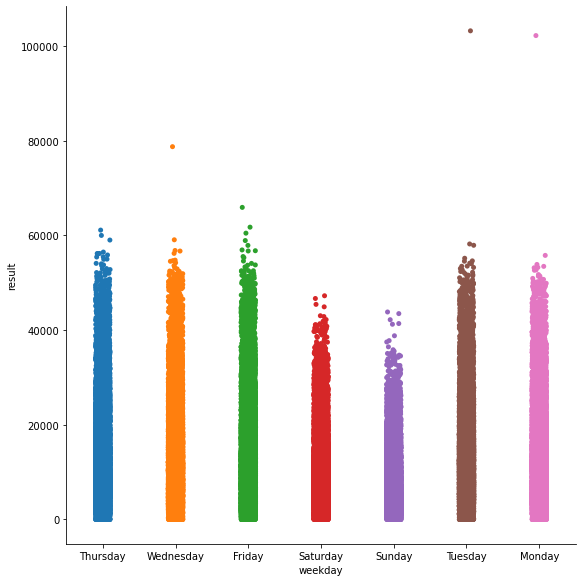

In [34]:
# Amount of cars per weekday
sns.catplot(x="weekday", y="result", data = df_clean_data, height=8)

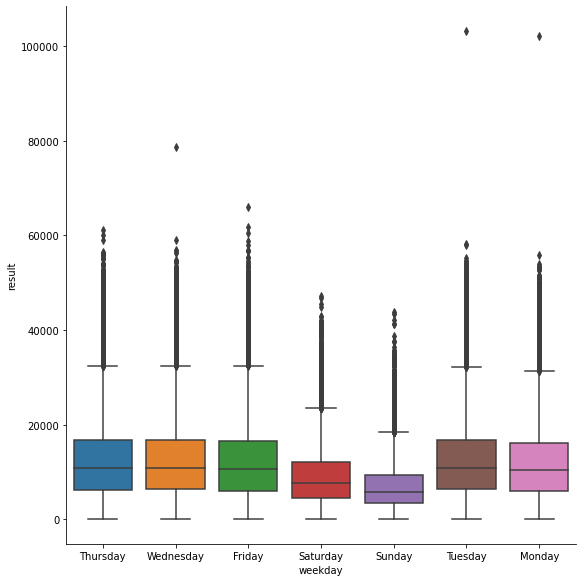

In [35]:
# Another way for visualiszation is using a boxplot. 
sns.catplot(x="weekday", y="result", kind="box", data=df_clean_data, height = 8)

In [36]:
# Calculating the average of each weekday
df_clean_data.groupby(['weekday']).mean()

,@iot.id,result,id,lat,long
weekday,,,,,
Friday,9.283046e+07,12666.090888,13886.317589,53.573169,10.007675
Monday,9.009124e+07,12349.687753,13882.058980,53.573188,10.007671
Saturday,9.013254e+07,9274.666410,13882.389306,53.573138,10.007724
Sunday,8.959840e+07,7132.234545,13881.767770,53.573136,10.007703
Thursday,9.210643e+07,12765.476050,13886.519569,53.573187,10.007512
Tuesday,9.064623e+07,12862.126155,13882.331640,53.573141,10.007551
Wednesday,9.145576e+07,12919.602767,13886.050389,53.573200,10.007595


In [27]:
# the highest average of vehicles is seen on Wednesdays. After that very close to each other are Tuesdays and Thursdays.
# Fourth in place is Friday followed by Monday, Saturday and Sunday.

<AxesSubplot:ylabel='result'>

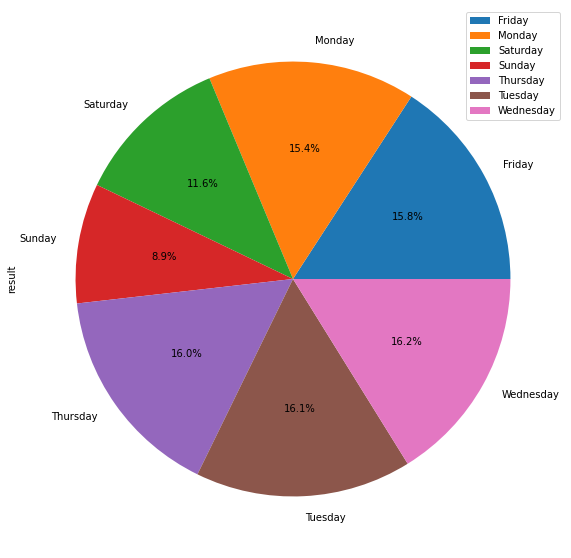

In [37]:
df_clean_data.groupby(['weekday']).mean().plot(kind='pie', y='result',figsize=(15,10),autopct='%1.1f%%')